In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
path = '/content/gdrive/MyDrive/Colab Notebooks/Santi/'

Mounted at /content/gdrive/


TTGDS: Total Depresion
TTLSS : Total Social Suport
Method quistioner TTLN UCLA

In [ ]:
import pandas as pd
from pandas import read_csv
datasetOri = read_csv(path+"depression.csv")
#n = len(dataset)
datasetOri.head()

,VAR00001,Birthday,Age,Gender,Race,Religion,EduLevel,MaritalStatus,NumberOfChildren,LivingStatus,EmployedNow,Jobnow,EmployeBefore,PastJob,Income,IncomeMonthlyCost,VisitCHCTmsYears,LeisureActivity,AttendLAtimesMonth,Comorbidity,HealthCondition,HearingProblem,HearingAids,VisualProblem,WhatVisualProblem,PermanentTeeth,OralStatus,Medication,ADLSBarthelIndex,IADLSLawton,CogFunctionSPMSQ,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,RL10,RL15,RL16,RL19,RL20,TTUCLA,RD1,RD2,RD3,RD4,RD5,RD6,RD7,RD8,RD9,RD10,RD11,RD12,RD13,RD14,RD15,TTGDS,RG,RR,RL,RE,RM,RLv,REn,REB,RICom,RHP,RVP,RPT,NewRPT,RHP2,HP3,Rcomor,CatGDS,CatGDS2
0,1,195908,60,1,2,1,4,2,8,3,0,0,1,2,400000,2,0,0,0,1,4,0,0,0,0,1,3,0,95,6,10,5,5,5,5,6,6,6,4,4,...,2,3,3,2,2,48,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,10,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1
1,2,195803,61,1,2,1,4,4,0,4,1,2,0,0,400000,2,12,0,0,1,4,0,0,0,0,1,4,0,95,8,10,5,5,6,6,6,5,4,4,4,...,3,4,2,2,2,48,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,9,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1
2,3,195807,61,1,2,1,4,2,3,3,0,0,0,0,400000,2,0,0,0,0,3,0,0,0,1,1,4,0,95,7,4,5,5,5,4,4,4,4,5,5,...,2,1,2,3,3,54,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,8,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1
3,4,195302,66,1,1,1,3,2,3,3,0,0,1,2,500000,2,9,0,0,1,4,0,0,1,1,1,3,1,85,0,10,7,7,7,6,5,5,6,6,6,...,2,3,3,3,3,56,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,9,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1
4,5,195704,62,2,3,1,1,2,2,3,0,0,0,0,500000,2,8,0,0,1,3,0,0,0,0,1,3,0,95,8,4,5,5,5,5,4,4,6,6,6,...,1,1,2,1,1,47,0,1,1,1,0,1,1,0,1,1,0,1,0,1,0,9,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1


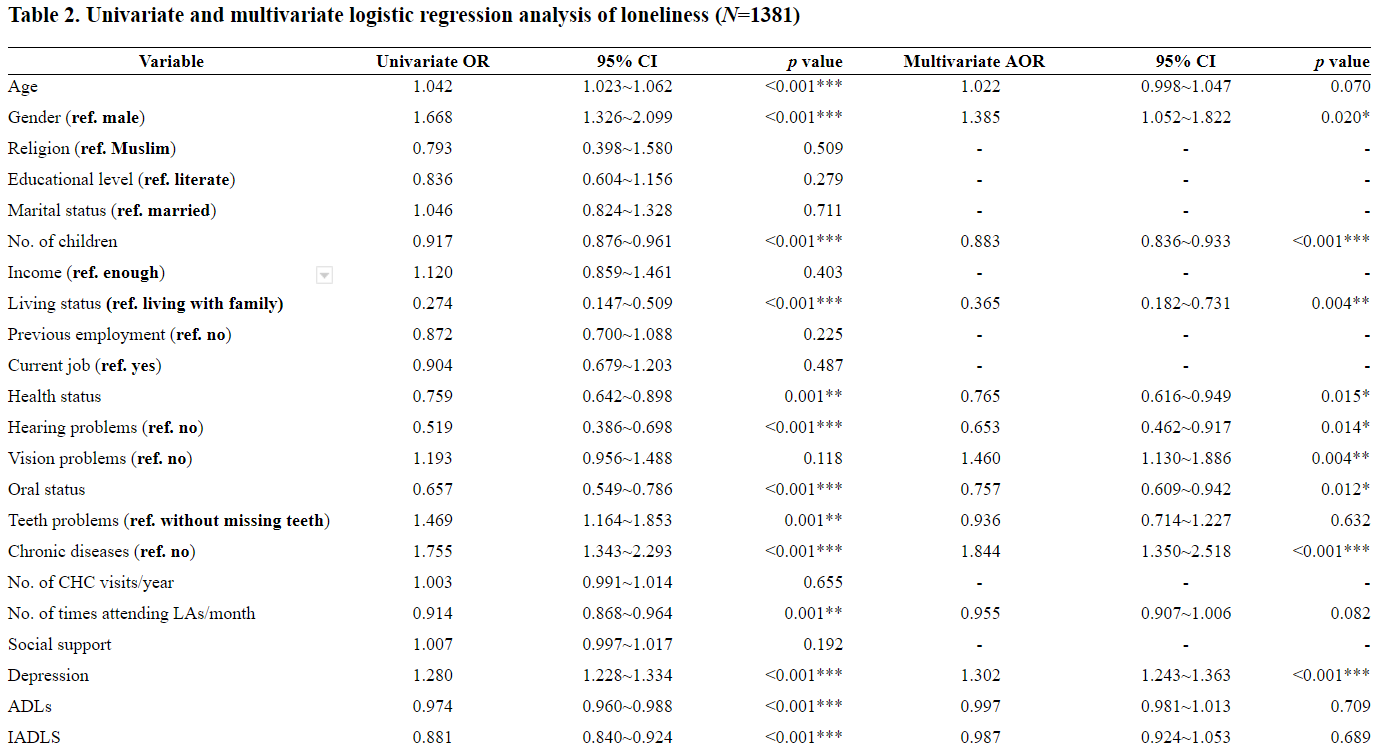

In [16]:
from sklearn.preprocessing import MinMaxScaler

interestColumn = ['Age', 'Gender', 'EduLevel', 'NumberOfChildren','LivingStatus',
                  'HealthCondition', 'HearingProblem', 'OralStatus', 'PermanentTeeth', 'Medication',
                  'ADLSBarthelIndex', 'IADLSLawton', 'CogFunctionSPMSQ', 'TTGDS']
dataset = datasetOri[interestColumn]
dataset


,Age,Gender,EduLevel,NumberOfChildren,LivingStatus,HealthCondition,HearingProblem,OralStatus,PermanentTeeth,Medication,ADLSBarthelIndex,IADLSLawton,CogFunctionSPMSQ,TTGDS
0,60,1,4,8,3,4,0,3,1,0,95,6,10,10
1,61,1,4,0,4,4,0,4,1,0,95,8,10,9
2,61,1,4,3,3,3,0,4,1,0,95,7,4,8
3,66,1,3,3,3,4,0,3,1,1,85,0,10,9
4,62,2,1,2,3,3,0,3,1,0,95,8,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,65,2,3,6,3,3,0,3,1,1,85,7,7,9
1377,61,2,4,1,1,3,0,3,0,1,100,8,9,10
1378,62,2,2,4,3,3,0,3,2,0,85,8,10,8
1379,62,2,4,6,3,3,0,3,0,1,100,6,10,9


In [24]:
import numpy as np

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 12].values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(), [1])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)

# Saat ini column gender pindah ke kolom 1 dan 2, kolom 1 laki2 kolom 2 perempuan (true false)
# Test uji 4 data X:[Age	Gender	EduLevel	NumberOfChildren] terhadap Y:[CogFunctionSPMSQ]
X = X[:, 1:5]
print(X)

[[ 0. 60.  4.  8.]
 [ 0. 61.  4.  0.]
 [ 0. 61.  4.  3.]
 ...
 [ 1. 62.  2.  4.]
 [ 1. 62.  4.  6.]
 [ 1. 65.  1.  6.]]


In [25]:
# Membagi data menjadi the Training set and Test set (20% ke test set dan 80% ke train set)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Membuat model Multiple Linear Regression dari Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
 
# Memprediksi hasil Test set
Y_pred = regressor.predict(X_test)

In [26]:
import statsmodels.api as sm
#menambah nilai const (Xo) pada fungsi Regression Y = Xo + a1*X1 + .....
X_new = sm.add_constant(X)
X_opt = X_new[:, [0, 1, 2, 3, 4]]

regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()
#Lihat Lihatlah pada bagian p value nya (P>|t|). variable Xn yg p value nya>0.05 dibuang saja

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     65.33
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.23e-50
Time:                        07:12:56   Log-Likelihood:                -2821.1
No. Observations:                1381   AIC:                             5652.
Df Residuals:                    1376   BIC:                             5678.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5178      0.591     22.890      0.000      12.359      14.676
x1            -0.2104      0.109     -1.932      0.054      -0.424       0.003
x2            -0.0927      0.008    -11.615      0.000      -0.108      -0.077
x3             0.3224      0.042      7.754      0.000       0.241       0.404
x4         -1.406e-05      0.022     -0.001      0.999      -0.043       0.043
==============================================================================
Omnibus:                      238.914   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.445
Skew:                          -1.065   Prob(JB):                     1.25e-94
Kurtosis:                       4.726   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regressor_OLS.pvalues)

[1.49709804e-101 9.71540555e-090 4.68228748e-102 8.07203390e-030
 1.71900520e-014 9.99485322e-001]


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
x = df[column_names_to_normalize] = df_temp